<a href="https://colab.research.google.com/github/ananyaangadi/Pursuit-Of-Happiness/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Reading in the newly integrated dataset

import pandas as pd
url='https://raw.githubusercontent.com/ananyaangadi/Pursuit-Of-Happiness/master/data.csv'
df = pd.read_csv(url)
df.head(20)

,Unnamed: 0,Economy (GDP per Capita),Generosity,Country,Happiness Rank,Health (Life Expectancy),year,Happiness Score,Trust (Government Corruption),Freedom,Continent
0,152,0.300706,0.135235,Afghanistan,153,0.266052,2020,2.5669,0.001226,0.000000,Asia
1,140,0.401477,0.311871,Afghanistan,141,0.180747,2017,3.7940,0.061158,0.106180,Asia
2,153,0.350000,0.158000,Afghanistan,154,0.361000,2019,3.2030,0.025000,0.000000,Asia
3,144,0.332000,0.191000,Afghanistan,145,0.255000,2018,3.6320,0.036000,0.085000,Asia
4,153,0.382270,0.312680,Afghanistan,154,0.173440,2016,3.3600,0.071120,0.164300,Asia
5,152,0.319820,0.365100,Afghanistan,153,0.303350,2015,3.5750,0.097190,0.234140,Asia
6,104,0.906653,0.171028,Albania,105,0.846330,2020,4.8827,0.025361,0.461946,Europe
7,111,0.916000,0.149000,Albania,112,0.790000,2018,4.5860,0.032000,0.419000,Europe
8,106,0.947000,0.178000,Albania,107,0.874000,2019,4.7190,0.027000,0.383000,Europe
9,94,0.878670,0.142720,Albania,95,0.813250,2015,4.9590,0.064130,0.357330,Europe


In [ ]:
# Get rid of the unnamed redundant column ( which was the key in previous dataframes )

df = df.iloc[:,1:]
df.head()

,Economy (GDP per Capita),Generosity,Country,Happiness Rank,Health (Life Expectancy),year,Happiness Score,Trust (Government Corruption),Freedom,Continent
0,0.300706,0.135235,Afghanistan,153,0.266052,2020,2.5669,0.001226,0.00000,Asia
1,0.401477,0.311871,Afghanistan,141,0.180747,2017,3.7940,0.061158,0.10618,Asia
2,0.350000,0.158000,Afghanistan,154,0.361000,2019,3.2030,0.025000,0.00000,Asia
3,0.332000,0.191000,Afghanistan,145,0.255000,2018,3.6320,0.036000,0.08500,Asia
4,0.382270,0.312680,Afghanistan,154,0.173440,2016,3.3600,0.071120,0.16430,Asia


In [ ]:
# Number of rows and columns

print(df.info())
# 782 rows, 9 attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Economy (GDP per Capita)       935 non-null    float64
 1   Generosity                     935 non-null    float64
 2   Country                        935 non-null    object 
 3   Happiness Rank                 935 non-null    int64  
 4   Health (Life Expectancy)       935 non-null    float64
 5   year                           935 non-null    int64  
 6   Happiness Score                935 non-null    float64
 7   Trust (Government Corruption)  934 non-null    float64
 8   Freedom                        935 non-null    float64
 9   Continent                      933 non-null    object 
dtypes: float64(6), int64(2), object(2)
memory usage: 73.2+ KB
None


In [ ]:
# simple measures of central tendency and spread

df.describe()

,Economy (GDP per Capita),Generosity,Happiness Rank,Health (Life Expectancy),year,Happiness Score,Trust (Government Corruption),Freedom
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,934.000000,935.000000
mean,0.908311,0.213797,78.420321,0.625581,2017.485561,5.394436,0.126301,0.419680
std,0.402023,0.119452,45.021905,0.250900,1.708260,1.124935,0.106998,0.152199
min,0.000000,0.000000,1.000000,0.000000,2015.000000,2.566900,0.000000,0.000000
25%,0.600264,0.127030,39.500000,0.449596,2016.000000,4.540000,0.054545,0.317835
50%,0.974380,0.199358,78.000000,0.667465,2017.000000,5.353500,0.092655,0.436000
75%,1.228785,0.271398,117.000000,0.814710,2019.000000,6.198500,0.157865,0.539885
max,2.096000,0.838075,158.000000,1.141000,2020.000000,7.808700,0.551910,0.724000


In [ ]:
'''
NOTE:
This data has been collected from the  Gallup World Poll,
and used to prepare the World Happiness Reports for the years 2015 to 2019.
Hence the data has been cleaned before being made available, 
which implies that there might be not be many missing values or outliers.
'''
print(df.isnull().sum())

# we see only one missing value
# this can be attributed to a random error, 
# and the corresponding tuple can be ignored

'''
The data has already been denoised, and is complete and consistent
This eliminates the need for further data cleaning.

There are no duplicates or redundancies in terms of data tuples.
No corrections are required

'''

Economy (GDP per Capita)         0
Generosity                       0
Country                          0
Happiness Rank                   0
Health (Life Expectancy)         0
year                             0
Happiness Score                  0
Trust (Government Corruption)    1
Freedom                          0
Continent                        2
dtype: int64


'\nThe data has already been denoised, and is complete and consistent\nThis eliminates the need for further data cleaning.\n\nThere are no duplicates or redundancies in terms of data tuples.\nNo corrections are required\n\n'

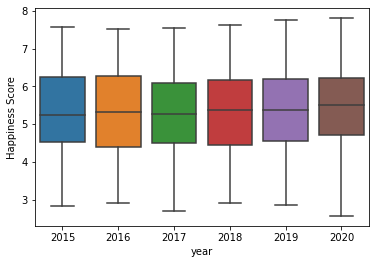

In [ ]:
# looking for outliers using boxplots

# finding outliers for the variable 'Happiness score'
# are there countries which are happier or sadder than usual?

import seaborn as sns # for visualizations
ax = sns.boxplot(x=df["year"], y=df["Happiness Score"])

# the boxplots indicate almost unskewed data
# the data seems to have no outliers
# Happiness scores seem to follow a symmetric distribution across countries

# note that the distribution of happiness score seems to remain fairly consistent over time

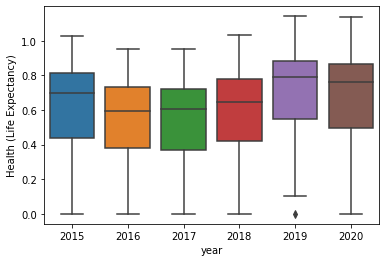

In [ ]:
# The extent to which health affected happiness over the years
ax = sns.boxplot(x=df["year"], y=df["Health (Life Expectancy)"])

# except 2015, the contribution of health to the total happiness score has increased over the years
# this could imply an overall increase in the life expectancy
# we also observe a negative skew, indicating life expectancy usually has a significant impact on happiness

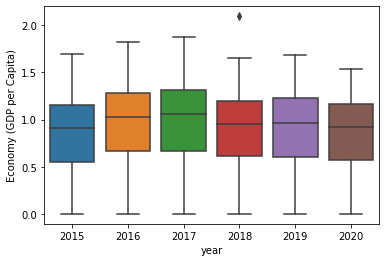

In [ ]:
# The extent to which GDP affected affected happiness over the years

ax = sns.boxplot(x=df["year"], y=df["Economy (GDP per Capita)"])

# the effect of GDP has mostly remained constant over the years
# 2016 and 2017 show slightly greater impact on happiness
# one outlier for 2018: needs further investigation

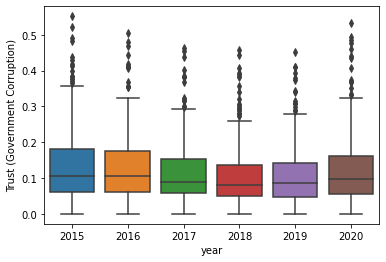

In [ ]:
# The extent to which government trust affected affected happiness over the years

ax = sns.boxplot(x=df["year"], y=df["Trust (Government Corruption)"])

# the contribution of government trust score is consistent over the years
# however, the contribution of this attribute is much lesser than that of the others
# this could indicate low trust in the government, or high corruption
# we also note a lot of outliers
# data has a positive skew
# could interpret as: though the general consensus on government trust isn't all that positive,
# there are countries with very high impact of govt trust on happiness
# by further finding which countries these are, can analyse the political impact

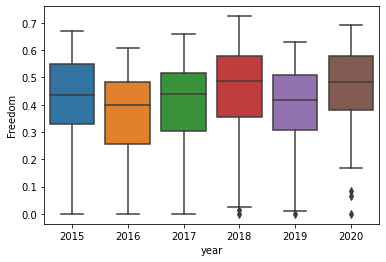

In [ ]:
# The extent to which freedom affected happiness over the years

ax = sns.boxplot(x=df["year"], y=df["Freedom"])

# no set pattern 
# few outliers
# the changes over the years can be atrributed to many factors: ruling govt, political unrest, etc
# very hard to say from the limited information

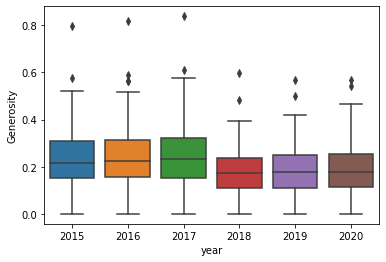

In [ ]:
# The extent to which generosity affected affected happiness over the years

ax = sns.boxplot(x=df["year"], y=df["Generosity"])

# decrease in impact of generosity in the last two years - why?
# Symmetric general, but quite a few outliers
# this means that, every year, there are some countries which report very high contribution of generosity to happiness
# are these richer or poorer countries? - further exploration required

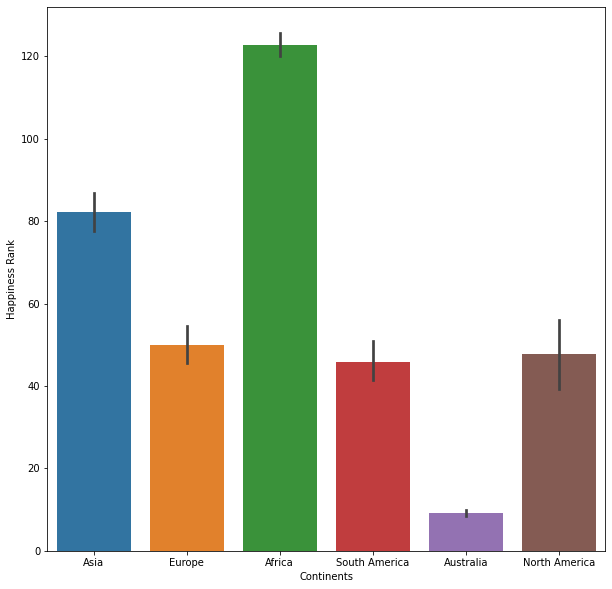

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.barplot(x=df['Continent'],y=df['Happiness Rank'])
plt.xlabel('Continents')
plt.ylabel('Happiness Rank')
plt.show()

#Shows that Africa is the continent with highest Ranks, is in accordance to the socio-economic factors observed.
#Australia is the happiest continent
#Can see a trend of more developed continents having better happiness ranks

In [ ]:
dff=df.sort_values(by=['Happiness Rank'],inplace=False)
print(dff['Country'].iloc[0])
print("Belonging to Continent:")
print("\t"+dff['Continent'].iloc[0])
print(dff['Country'].iloc[-1])
print("Belonging to Continent:")
print("\t"+dff['Continent'].iloc[-1])
#the happiest country
#the least happy country

Finland
Belonging to Continent:
	Asia
Togo
Belonging to Continent:
	Africa


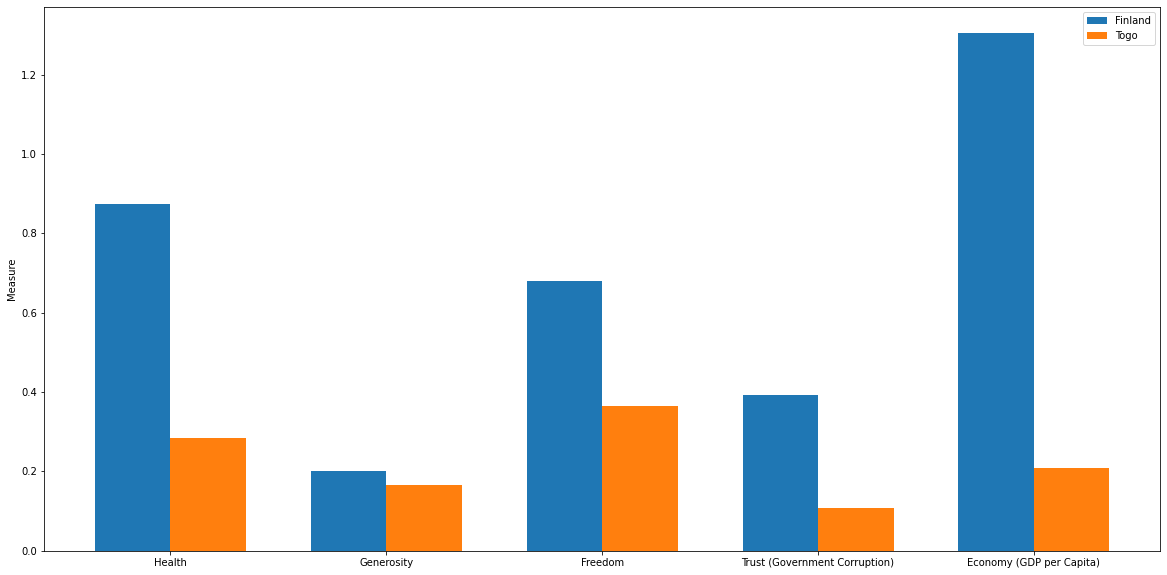

In [ ]:
#Comparing all numeric attributes between Finland and Togo:
import numpy as np
labels=['Health','Generosity','Freedom','Trust (Government Corruption)','Economy (GDP per Capita)']
Finland_values=dff[['Health (Life Expectancy)','Generosity','Freedom','Trust (Government Corruption)','Economy (GDP per Capita)']].iloc[0]
Togo_values=dff[['Health (Life Expectancy)','Generosity','Freedom','Trust (Government Corruption)','Economy (GDP per Capita)']].iloc[-1]
x = np.arange(len(labels)) 
width = 0.35  
fig, ax = plt.subplots(figsize=(20,10))
rect_fin = ax.bar(x - width/2, Finland_values, width, label='Finland')
rect_togo = ax.bar(x + width/2, Togo_values, width, label='Togo')
ax.set_ylabel('Measure')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()
#Observation: Genorisity in Togo is slightly higher than genorisity levels in Finland.
#Maybe happiness does not have a direct affect on generous nature.
#Wide disparities in Health and Economy suggest they could be major causes of unhappiness.

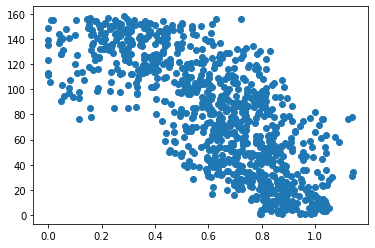

In [ ]:
#Effects of an individual attribute
plt.scatter(df['Health (Life Expectancy)'],df['Happiness Rank'])
plt.show()
#Noticeable positive correlation between Health and Happiness.

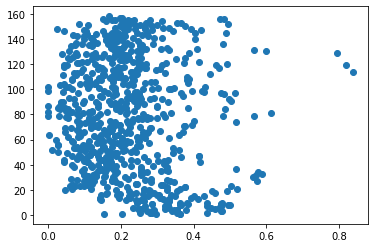

In [ ]:
plt.scatter(df['Generosity'],df['Happiness Rank'])
plt.show()
#Absolutely no correlation between Generosity and Happiness.
#According to the plot the most generous countries have higher happiness ranks.

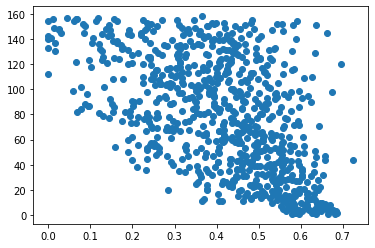

In [ ]:
plt.scatter(df['Freedom'],df['Happiness Rank'])
plt.show()
#Weak correlation between Freedom and Happiness.

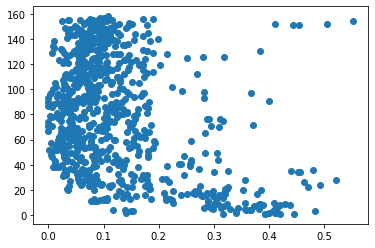

In [ ]:
plt.scatter(df['Trust (Government Corruption)'],df['Happiness Rank'])
plt.show()
#No correlation between Trust and Happiness.
#Trend suggests very few countries have high trust scores.

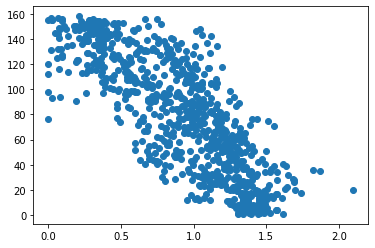

In [ ]:
plt.scatter(df['Economy (GDP per Capita)'],df['Happiness Rank'])
plt.show()
#Noticable correlation between Economy and Happiness.

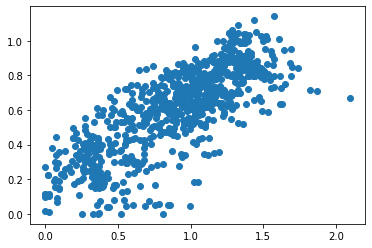

In [ ]:
#Investigating whether economy and health might themsevles be correlated
plt.scatter(df['Economy (GDP per Capita)'],df['Health (Life Expectancy)'])
plt.show()
#Shows a positive trend Economy has some effect on Life Expectancy
#Possibly explained by countries having higher economy have sufficient earnings to be able to access healthcare.

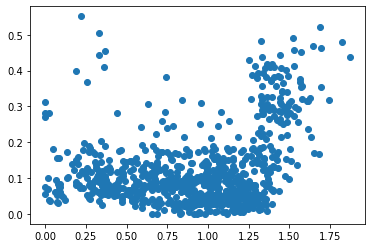

In [ ]:
#Investigating whether economy and trust might themsevles be correlated
plt.scatter(df['Economy (GDP per Capita)'],df['Trust (Government Corruption)'])
plt.show()
#Shows no specific trend

In [ ]:
#Takeaways 
#Economy and Health seem to influence Happiness the most
#There is some correlation between the Economy and Health of a country
#Level of Generosity does not seem to be correlated to happiness

In [ ]:
# top 10 happiest countries 

avg_country_happiness = {}
count1 = {}
for ind in df.index:
    avg_country_happiness[df['Country'][ind]] = 0
    count1[df['Country'][ind]] = 0

for ind in df.index:
    avg_country_happiness[df['Country'][ind]] += df['Happiness Score'][ind]
    count1[df['Country'][ind]] += 1

for i in avg_country_happiness:
    avg_country_happiness[i] = avg_country_happiness[i]/count1[i]


In [ ]:
# top 10 happiest countries

plo = {}
count = 0
for i in sorted(avg_country_happiness,key = lambda x:avg_country_happiness[x],reverse=True):
    if count == 10:
        break
    plo[i] = avg_country_happiness[i]
    count += 1

print("The top 10 countries in terms of average happiness score")
for i in plo:
    print(i,plo[i])

The top 10 countries in terms of average happiness score
Denmark 7.545999967193604
Norway 7.541000035858152
Finland 7.537799972534181
Switzerland 7.511399991607666
Iceland 7.511000037384034
Netherlands 7.4045999710083
Canada 7.350599996948242
Sweden 7.319199983978272
New Zealand 7.313000025939941
Australia 7.276199983978271


In [ ]:
# top 10 unhappiest countries

plo = {}
count = 0
for i in sorted(avg_country_happiness,key = lambda x:avg_country_happiness[x]):
    if count == 10:
        break
    plo[i] = avg_country_happiness[i]
    count += 1

print("The bottom 10 countries in terms of average happiness score")
for i in plo:
    print(i,plo[i])

The bottom 10 countries in terms of average happiness score
Burundi 3.078999994277954
Central African Republic 3.134250019550323
Syria 3.292199978637696
South Sudan 3.3825000200271598
Rwanda 3.4385999912261958
Tanzania 3.4659999954223637
Afghanistan 3.512799982070922
Togo 3.5441999771118162
Yemen 3.6257999870300304
Madagascar 3.745400010681152


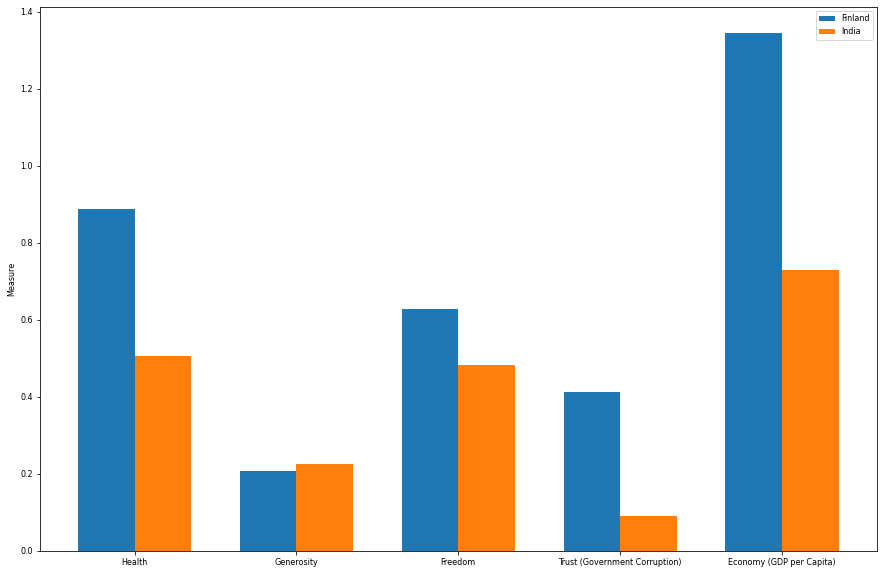

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 8}

matplotlib.rc('font', **font)



# India vs Finland (The happiest country for 3 years staright)



ind_val = []
fin_val = []

dff=df.sort_values(by=['Happiness Rank'],inplace=False)

labels=['Health (Life Expectancy)','Generosity','Freedom','Trust (Government Corruption)','Economy (GDP per Capita)']
india_values = {}
for i in labels:
    india_values[i] = 0
for ind in df.index:
    if df['Country'][ind] == 'India':
        for i in labels:
            india_values[i] += df[i][ind]
for i in india_values:
    india_values[i] = india_values[i]/count1['India']
for i in india_values:
    ind_val.append(india_values[i])

fin_values = {}
for i in labels:
    fin_values[i] = 0
for ind in df.index:
    if df['Country'][ind] == 'Finland':
        for i in labels:
            fin_values[i] += df[i][ind]
for i in fin_values:
    fin_values[i] = fin_values[i]/count1['Finland']
for i in fin_values:
    fin_val.append(fin_values[i])
    
    
labels[0] = 'Health'

x = np.arange(len(labels)) 
width = 0.35  
fig, ax = plt.subplots(figsize=(15,10))
rect_fin = ax.bar(x - width/2, fin_val, width, label='Finland')
rect_ind = ax.bar(x + width/2, ind_val, width, label='India')
ax.set_ylabel('Measure')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

# A very significant differentiating factor is Goverment Trust
# Another point of difference: GDP

# Thus,India needs to reduce corruption and increase GDP to be as happy as the likes of Finland

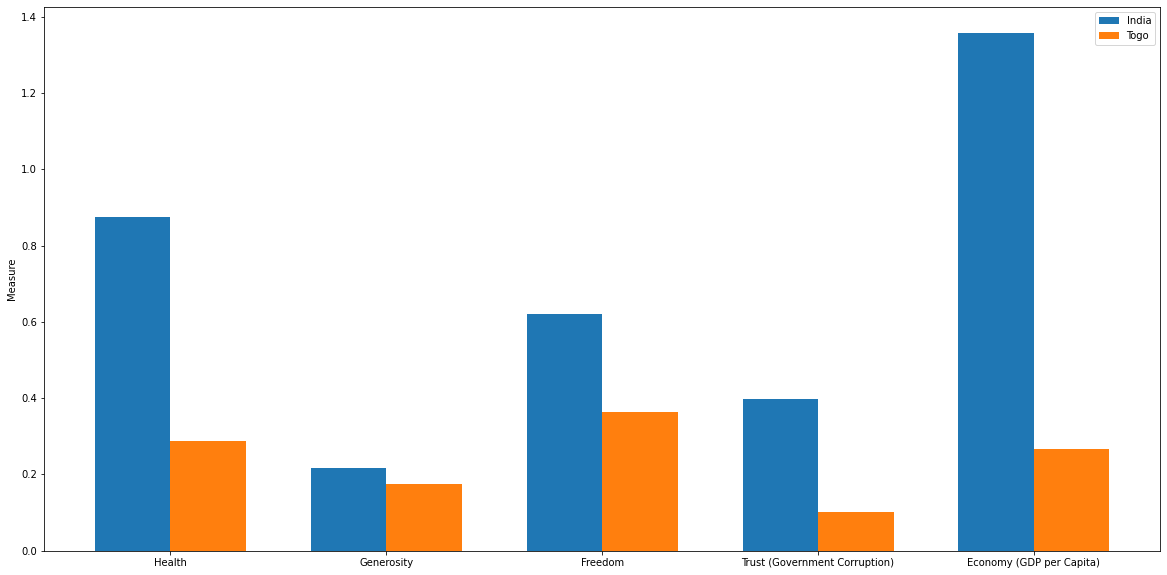

In [ ]:


# India vs Togo (The unhappiest country)

import numpy as np
import matplotlib.pyplot as plt

tog_val = []

dff=df.sort_values(by=['Happiness Rank'],inplace=False)

labels=['Health (Life Expectancy)','Generosity','Freedom','Trust (Government Corruption)','Economy (GDP per Capita)']
india_values = {}
for i in labels:
    india_values[i] = 0
for ind in df.index:
    if df['Country'][ind] == 'India':
        for i in labels:
            india_values[i] += df[i][ind]
for i in india_values:
    india_values[i] = india_values[i]/count1['India']
for i in india_values:
    ind_val.append(india_values[i])

tog_values = {}
for i in labels:
    tog_values[i] = 0
for ind in df.index:
    if df['Country'][ind] == 'Togo':
        for i in labels:
            tog_values[i] += df[i][ind]
for i in tog_values:
    tog_values[i] = tog_values[i]/count1['Togo']
for i in tog_values:
    tog_val.append(tog_values[i])
    
    
labels[0] = 'Health'

x = np.arange(len(labels)) 
width = 0.35  
fig, ax = plt.subplots(figsize=(20,10))
rect_ind = ax.bar(x - width/2, fin_val, width, label='India')
rect_tog = ax.bar(x + width/2, tog_val, width, label='Togo')
ax.set_ylabel('Measure')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

# A factor which leads to a happier India in comparision to Togo is the GDP and health

# KEY LESSON FROM THESE TWO PLOTS
# Finland is most developed
# India is moderately developed
# Togo is relatively less developed

# Development influences economy, and economy influences HAPPINESS

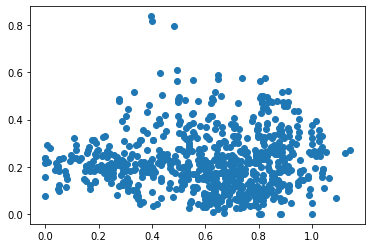

In [ ]:
# Generosity vs economy

import matplotlib.pyplot as plt

plt.scatter(df['Health (Life Expectancy)'],df['Generosity'])
plt.show()


In [ ]:
import chart_studio.plotly
import plotly.graph_objs as go
from plotly.offline import iplot





data = dict(type = 'choropleth', 
           locations = df['Country'],
           locationmode = 'country names',
           z = df['Happiness Score'], 
           text = df['Country'],
           colorbar = {'title':'Happiness'})
layout = dict(title = 'The geography of happiness', geo = dict(showframe = True, 
                       projection = {'type': 'mercator'}))
map = go.Figure(data = [data], layout=layout)

map.update_layout(
    autosize=False,
    width=1200,
    height=800,)
iplot(map)